In [1]:
import pandas as pd

data = pd.read_csv(r'C:\Users\feliz\Documents\aprendiendo python rapido\machine learning\DatasaurusDozen.tsv', sep='\t')
data.head()
#df["A"] = pd.to_numeric(df["A"], downcast="float")
print(data)

         dataset          x          y
0           dino  55.384600  97.179500
1           dino  51.538500  96.025600
2           dino  46.153800  94.487200
3           dino  42.820500  91.410300
4           dino  40.769200  88.333300
...          ...        ...        ...
1841  wide_lines  33.674442  26.090490
1842  wide_lines  75.627255  37.128752
1843  wide_lines  40.610125  89.136240
1844  wide_lines  39.114366  96.481751
1845  wide_lines  34.583829  89.588902

[1846 rows x 3 columns]


In [2]:
len(data['dataset'].unique())

13

In [3]:
data['dataset'].unique()


array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [4]:
datasets_grouped = data.groupby('dataset')
datasets_grouped.agg(['count', 'mean', 'var', 'std'])

x                                       y             \
           count       mean         var        std count       mean   
dataset                                                               
away         142  54.266100  281.227029  16.769825   142  47.834721   
bullseye     142  54.268730  281.207393  16.769239   142  47.830823   
circle       142  54.267320  280.898024  16.760013   142  47.837717   
dino         142  54.263273  281.069988  16.765142   142  47.832253   
dots         142  54.260303  281.156953  16.767735   142  47.839829   
h_lines      142  54.261442  281.095333  16.765898   142  47.830252   
high_lines   142  54.268805  281.122364  16.766704   142  47.835450   
slant_down   142  54.267849  281.124206  16.766759   142  47.835896   
slant_up     142  54.265882  281.194420  16.768853   142  47.831496   
star         142  54.267341  281.197993  16.768959   142  47.839545   
v_lines      142  54.269927  281.231512  16.769959   142  47.836988   
wide_lines   142  54.266916  281.232887  16.770000   142  47.831602   
x_shape      142  54.260150  281.231481  16.769958   142  47.839717   

                                   
                   var        std  
dataset                            
away        725.749775  26.939743  
bullseye    725.533372  26.935727  
circle      725.226844  26.930036  
dino        725.515961  26.935403  
dots        725.235215  26.930192  
h_lines     725.756931  26.939876  
high_lines  725.763490  26.939998  
slant_down  725.553749  26.936105  
slant_up    725.688605  26.938608  
star        725.239695  26.930275  
v_lines     725.638809  26.937684  
wide_lines  725.650560  26.937902  
x_shape     725.224991  26.930002

In [5]:

corr = data.groupby('dataset')[['x','y']].corr().iloc[0::2,-1]
print(corr)


dataset      
away        x   -0.064128
bullseye    x   -0.068586
circle      x   -0.068343
dino        x   -0.064472
dots        x   -0.060341
h_lines     x   -0.061715
high_lines  x   -0.068504
slant_down  x   -0.068980
slant_up    x   -0.068609
star        x   -0.062961
v_lines     x   -0.069446
wide_lines  x   -0.066575
x_shape     x   -0.065583
Name: y, dtype: float64


In [6]:
cov_matrix = data.groupby('dataset').cov()
print(cov_matrix)


                       x           y
dataset                             
away       x  281.227029  -28.971572
           y  -28.971572  725.749775
bullseye   x  281.207393  -30.979902
           y  -30.979902  725.533372
circle     x  280.898024  -30.846620
           y  -30.846620  725.226844
dino       x  281.069988  -29.113933
           y  -29.113933  725.515961
dots       x  281.156953  -27.247681
           y  -27.247681  725.235215
h_lines    x  281.095333  -27.874816
           y  -27.874816  725.756931
high_lines x  281.122364  -30.943012
           y  -30.943012  725.763490
slant_down x  281.124206  -31.153399
           y  -31.153399  725.553749
slant_up   x  281.194420  -30.992806
           y  -30.992806  725.688605
star       x  281.197993  -28.432772
           y  -28.432772  725.239695
v_lines    x  281.231512  -31.371608
           y  -31.371608  725.638809
wide_lines x  281.232887  -30.075267
           y  -30.075267  725.650560
x_shape    x  281.231481  -29.618418
 

In [7]:
from scipy import stats

# let’s calculate the summary statistics (mean, variance and standard deviation)
lr_datasets = datasets_grouped.apply(lambda x: stats.linregress(data['x'], data['y']))

slopes = []
intercepts = []
rvalues = []

for i in range(0,13):
    index_dataset = lr_datasets.index[i]
    slopes.append(lr_datasets[index_dataset].slope)
    intercepts.append(lr_datasets[index_dataset].intercept)
    rvalues.append(lr_datasets[index_dataset].rvalue)

df_lr_datasets = pd.DataFrame(data=list(zip(slopes, intercepts, rvalues)), columns=['Slopes', 'Intercepts', 'R values'])
df_lr_datasets = df_lr_datasets.set_index(lr_datasets.index)

df_lr_datasets

,Slopes,Intercepts,R values
dataset,,,
away,-0.106053,53.590127,-0.066019
bullseye,-0.106053,53.590127,-0.066019
circle,-0.106053,53.590127,-0.066019
dino,-0.106053,53.590127,-0.066019
dots,-0.106053,53.590127,-0.066019
h_lines,-0.106053,53.590127,-0.066019
high_lines,-0.106053,53.590127,-0.066019
slant_down,-0.106053,53.590127,-0.066019
slant_up,-0.106053,53.590127,-0.066019


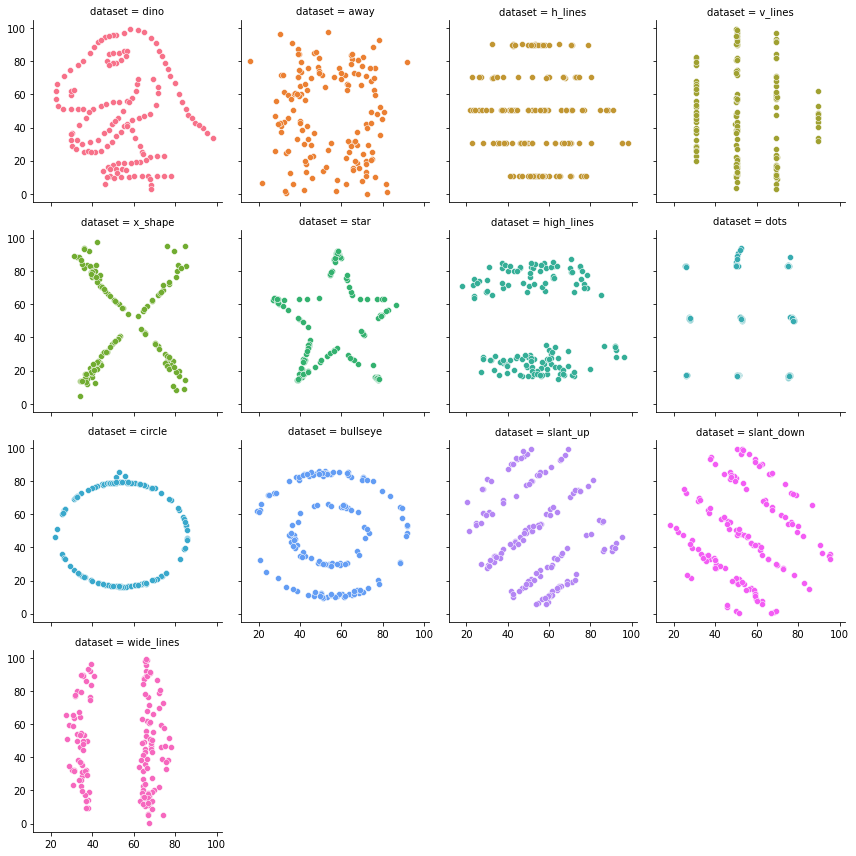

In [8]:
import seaborn as sns
grid_scatterplots = sns.FacetGrid(data, col="dataset", hue="dataset", col_wrap=4)
grid_scatterplots.map_dataframe(sns.scatterplot, x="x", y="y")

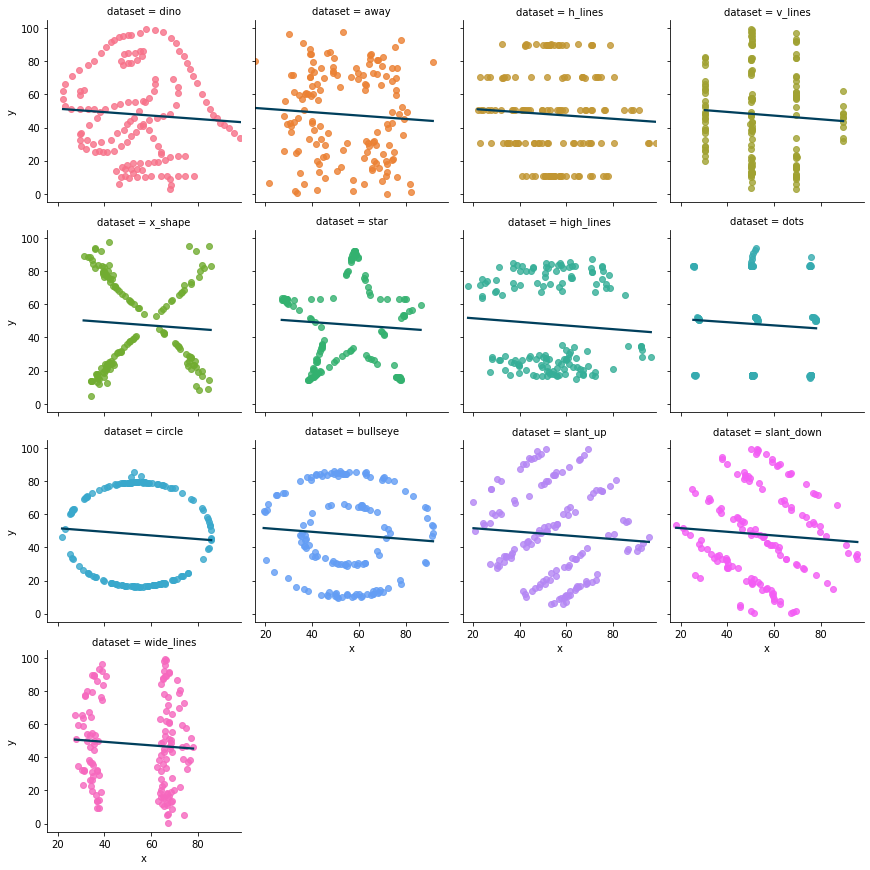

In [9]:
sns.lmplot(data=data, x="x", y="y", col="dataset", hue="dataset", line_kws={'color': '#003f5c'}, col_wrap=4, ci=None, height=3)


In [10]:
import persim
import matplotlib.pyplot as plt
import numpy as np
import tadasets
import ripser
import gudhi as gd


    dataset        x        y
0      dino  55.3846  97.1795
1      dino  51.5385  96.0256
2      dino  46.1538  94.4872
3      dino  42.8205  91.4103
4      dino  40.7692  88.3333
..      ...      ...      ...
137    dino  39.4872  25.3846
138    dino  91.2821  41.5385
139    dino  50.0000  95.7692
140    dino  47.9487  95.0000
141    dino  44.1026  92.6923

[142 rows x 3 columns]
[[55.3846 97.1795]
 [51.5385 96.0256]
 [46.1538 94.4872]
 [42.8205 91.4103]
 [40.7692 88.3333]
 [38.7179 84.8718]
 [35.641  79.8718]
 [33.0769 77.5641]
 [28.9744 74.4872]
 [26.1538 71.4103]
 [23.0769 66.4103]
 [22.3077 61.7949]
 [22.3077 57.1795]
 [23.3333 52.9487]
 [25.8974 51.0256]
 [29.4872 51.0256]
 [32.8205 51.0256]
 [35.3846 51.4103]
 [40.2564 51.4103]
 [44.1026 52.9487]
 [46.6667 54.1026]
 [50.     55.2564]
 [53.0769 55.641 ]
 [56.6667 56.0256]
 [59.2308 57.9487]
 [61.2821 62.1795]
 [61.5385 66.4103]
 [61.7949 69.1026]
 [57.4359 55.2564]
 [54.8718 49.8718]
 [52.5641 46.0256]
 [48.2051 38.3333]
 [49.487

usetex mode requires TeX.


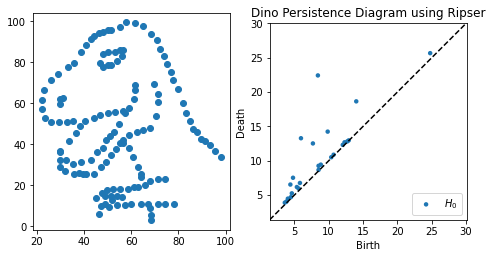

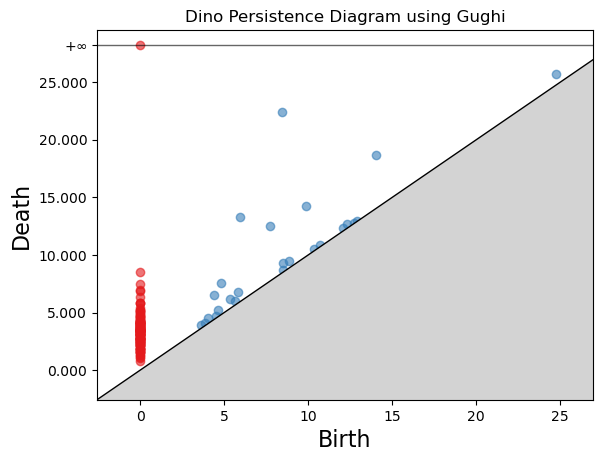

In [11]:



#y=data.loc[data.loc[:, 'dataset'] == 'dino']
#print(y['y'])

y = data.loc[data['dataset'] == 'dino']
y.shape
print(y)


dino = np.array([[y['x'][i], y['y'][i]] for i in range(len(y['x']))])

dino.shape
print(dino)



max_hom_dim = 1
dino_rips_complex = gd.RipsComplex(points = dino).create_simplex_tree(max_dimension = max_hom_dim + 1)
dino_ph = dino_rips_complex.persistence()

plt.figure(figsize=(12, 4))
plt.subplot(131)
#fig, ax = plt.subplots()
plt.scatter(y['x'], y['y'])



I1 = ripser.ripser(dino)['dgms'][1]


plt.subplot(132)
plt.title("Dino Persistence Diagram using Ripser");
persim.plot_diagrams(I1)

#plt.subplot(133)

gd.plot_persistence_diagram(persistence = dino_ph)
plt.title("Dino Persistence Diagram using Gughi");

#plot_diagrams(I1)

plt.show()

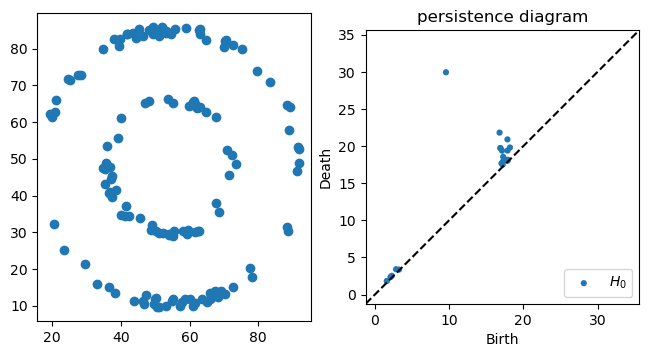

In [12]:

#y1=data.loc[data.loc[:, 'dataset'] == 'bullseye']
#y1.shape
#print(y1)
#len(y1['y'])

y1 = data.loc[data['dataset'] == 'bullseye']
y1.shape
#print(y1)
#bullseye = np.array([[y1['x'][i], y1['y'][i]] for i in range(len(y1['y']))])

#circle1=np.array([np.array(y1['x']),np.array(y1['y'])])
bullseye = np.array([[np.array(y1['x'])[i], np.array(y1['y'])[i]] for i in range(len(y1['y']))])
#print(circle1.shape)
#print(circle2.shape)


plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(y1['x'], y1['y'])

plt.subplot(132)
I2 = ripser.ripser(bullseye)['dgms'][1]

plt.title('persistence diagram')
persim.plot_diagrams(I2)

plt.show()

Elapsed Time Matching: 0.149


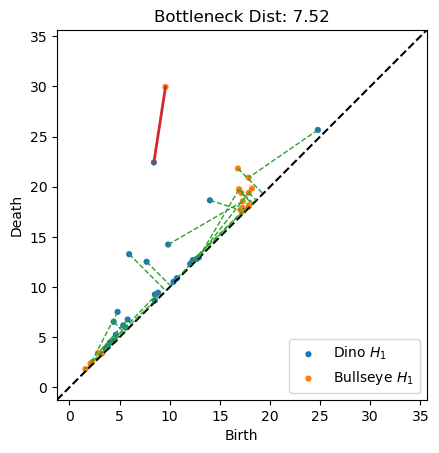

In [13]:
import time


tic = time.time()
distance_bottleneck, matching = persim.bottleneck(I1, I2, matching=True)
persim.bottleneck_matching(I1, I2, matching, labels=['Dino $H_1$', 'Bullseye $H_1$'])
plt.title("Bottleneck Dist: %.3g"%distance_bottleneck)

print("Elapsed Time Matching: %.3g"%(time.time()-tic))



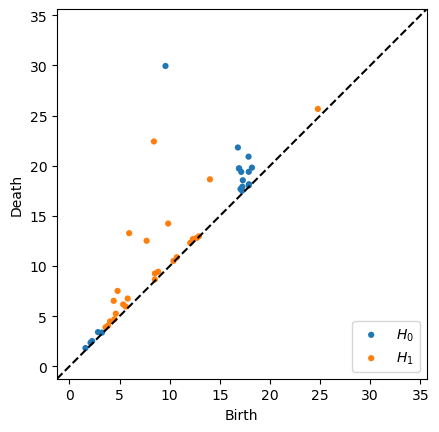

In [15]:
persim.plot_diagrams([I2,I1])
plt.show()

